In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Clean German and English stopwords
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    german_stopwords = set(stopwords.words('german'))
    english_stopwords = set(stopwords.words('english'))
    
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        cleaned_tokens = [token for token in tokens if token not in german_stopwords and token not in english_stopwords and token.isalpha()]
        cleaned_text = ' '.join(cleaned_tokens)
        return cleaned_text
    else:
        return text

# Read XLSX file using pandas
input_file = '2022_2023_churn_SF.xlsx'
output_file = 'output.csv'  # Still saving as CSV

# Specify the column you want to clean
column_name = 'Reason for churn'

df = pd.read_excel(input_file)

# Clean text in the specified column
df[column_name] = df[column_name].apply(clean_text)

# Remove duplicates
cleaned_df = df.drop_duplicates(subset=column_name)

# Reset the index after removing duplicates
cleaned_df = cleaned_df.reset_index(drop=True)

# Write cleaned data to a new CSV file
# cleaned_df.to_csv(output_file, index=False, encoding='utf-8')

# print("Data cleaned and saved to", output_file)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/root/venv/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
nan_counts = cleaned_df.isna().sum()
print(nan_counts)


TotalPrice (converted)                0
Created Date                          0
Start Date                            0
Ultimate Parent Account Name          0
Account Name                          0
Reason for churn                      1
Subscription Product: Product Name    0
End Date                              0
Cancellation Date                     0
dtype: int64


In [3]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Combine all cleaned text in the 'Reason for churn' column into a single string
all_text = ' '.join(cleaned_df['Reason for churn'].astype(str).values.flatten())

# Tokenize the combined text
tokens = word_tokenize(all_text)

# Count the occurrences of each word
word_counts = Counter(tokens)

# Get the top 50 most common words
top_50_words = word_counts.most_common(50)

# Print the top 50 words
print("Top 50 words in 'Reason for churn' column:")
for word, count in top_50_words:
    print(word, "-", count)


Top 50 words in 'Reason for churn' column:
system - 65
kunde - 53
gelöscht - 45
löschung - 39
informiert - 35
zwecks - 33
per - 24
softgarden - 21
wurde - 15
zufrieden - 14
recruiting - 12
mehr - 10
tool - 9
lösung - 8
angefragt - 8
kündigung - 8
entschieden - 8
kündigen - 8
nutzen - 7
leider - 7
hr - 7
müssen - 7
personio - 7
mail - 6
systems - 6
grund - 5
daten - 5
bereits - 5
allerdings - 5
sg - 5
neues - 5
preiserhöhung - 5
stellen - 4
rückmeldung - 4
entscheidung - 4
job - 4
angeschrieben - 4
insolvenz - 4
personalmanagement - 4
aufgrund - 4
unserer - 4
eingeführt - 4
möchte - 4
service - 4
aktuell - 4
unternehmen - 4
gute - 4
digitale - 3
sap - 3
weshalb - 3


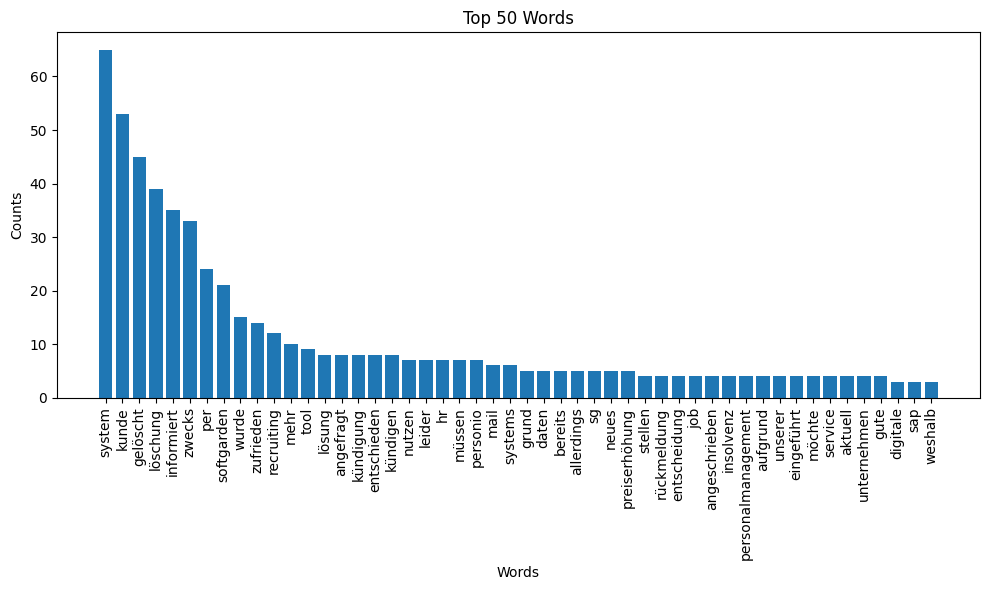

In [4]:
import matplotlib.pyplot as plt
from collections import Counter

# Combine all cleaned text in the 'Reason for churn' column into a single string
all_text = ' '.join(cleaned_df['Reason for churn'].astype(str).values.flatten())

# Tokenize the combined text
tokens = word_tokenize(all_text)

# Count the occurrences of each word
word_counts = Counter(tokens)

# Exclude 'nan' from the word counts
word_counts.pop('nan', None)

# Get the top 50 most common words
top_50_words = word_counts.most_common(50)

# Extract words and counts for plotting
words = [word for word, count in top_50_words]
counts = [count for word, count in top_50_words]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 50 Words')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [5]:
df.shape

(501, 9)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=99ba2cd5-66fe-4f34-a42a-fa663f3faca0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>